In [1]:
# !pip install dask
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 15.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.5 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd
# import dask
# import dask.dataframe as dd
import numpy as np
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
traincols = ['date_time', 'site_name', 'posa_continent', 'user_location_country',
             'user_location_region', 'user_location_city', 'orig_destination_distance',
             'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
             'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id',
             'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent',
             'hotel_country', 'hotel_market', 'hotel_cluster']

testcols = ['id', 'date_time', 'site_name', 'posa_continent', 'user_location_country',
            'user_location_region', 'user_location_city', 'orig_destination_distance',
            'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
            'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id',
            'srch_destination_type_id', 'hotel_continent', 'hotel_country', 'hotel_market']

In [4]:
def read_csv(filename: str, cols: List[str], nrows: int = None) -> pd.DataFrame:
  datecols = ['date_time', 'srch_ci', 'srch_co']
  dateparser = lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S', errors='coerce')

  dtypes = {
        'id': np.uint32,
        'site_name': np.uint8,
        'posa_continent': np.uint8,
        'user_location_country': np.uint16,
        'user_location_region': np.uint16,
        'user_location_city': np.uint16,
        'orig_destination_distance': np.float32,
        'user_id': np.uint32,
        'is_mobile': bool,
        'is_package': bool,
        'channel': np.uint8,
        'srch_adults_cnt': np.uint8,
        'srch_children_cnt': np.uint8,
        'srch_rm_cnt': np.uint8,
        'srch_destination_id': np.uint32,
        'srch_destination_type_id': np.uint8,
        'is_booking': bool,
        'cnt': np.uint64,
        'hotel_continent': np.uint8,
        'hotel_country': np.uint16,
        'hotel_market': np.uint16,
        'hotel_cluster': np.uint8,
    }

  df = pd.read_csv(
        filename,
        nrows=nrows,
        usecols=cols,
        dtype=dtypes, # dtype can also specify datatypes for columns that do not excist in the particular datafile
        parse_dates=[col for col in datecols if col in cols], # columns here must be also in usecols
        date_parser=dateparser,
  )
  
  return df

In [5]:
destinations = pd.read_csv("../data/destinations.csv")
test = read_csv("../data/test.csv", cols=testcols)
train = read_csv("../data/train.csv", cols=traincols, nrows=10000)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  10000 non-null  datetime64[ns]
 1   site_name                  10000 non-null  uint8         
 2   posa_continent             10000 non-null  uint8         
 3   user_location_country      10000 non-null  uint16        
 4   user_location_region       10000 non-null  uint16        
 5   user_location_city         10000 non-null  uint16        
 6   orig_destination_distance  6271 non-null   float32       
 7   user_id                    10000 non-null  uint32        
 8   is_mobile                  10000 non-null  bool          
 9   is_package                 10000 non-null  bool          
 10  channel                    10000 non-null  uint8         
 11  srch_ci                    9993 non-null   datetime64[ns]
 12  srch_

In [7]:
destinations.to_pickle('../data/destinations.pkl')
test.to_pickle('../data/test.pkl')
train.to_pickle('../data/train_10k.pkl')

In [8]:
# data = dd.read_csv('../data/train.csv').compute()

In [9]:
destinations = pd.read_pickle("../data/destinations.pkl")
test = pd.read_pickle("../data/test.pkl")
train = pd.read_pickle("../data/train_10k.pkl")

In [10]:
train.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.264160,12,False,True,...,0,1,8250,1,False,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.264160,12,False,True,...,0,1,8250,1,True,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.264160,12,False,False,...,0,1,8250,1,False,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.193176,93,False,False,...,0,1,14984,1,False,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.625916,93,False,False,...,0,1,14984,1,False,1,2,50,1457,21


In [11]:
test.head(5)

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.056641,1,True,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.292480,1,True,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.977539,20,False,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.597534,28,False,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.791298,50,False,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [12]:
train["hotel_cluster"].value_counts()

91    257
41    237
65    227
48    204
25    188
     ... 
93     37
75     32
88     29
27     16
74      9
Name: hotel_cluster, Length: 100, dtype: int64

In [13]:
test_ids = set(test.user_id.unique())
train_ids = set(train.user_id.unique())
intersection_count = len(test_ids & train_ids)
intersection_count == len(test_ids)

False

### 各hotel_continentの数

<Axes: xlabel='hotel_continent', ylabel='count'>

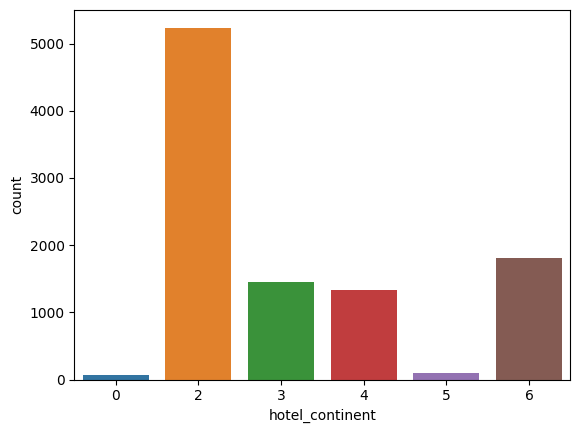

In [14]:
sns.countplot(x='hotel_continent', data=train)

### posa_continentの数

<Axes: xlabel='posa_continent', ylabel='count'>

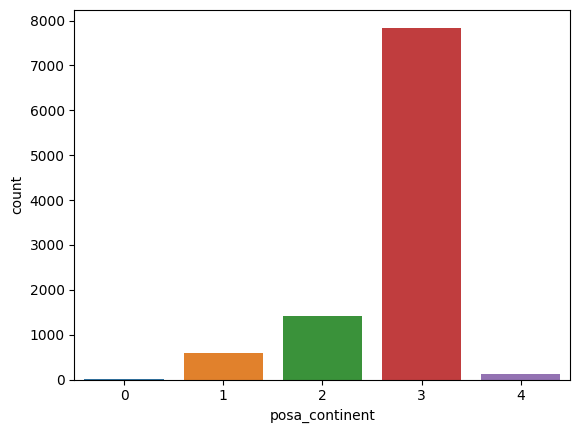

In [15]:
sns.countplot(x='posa_continent', data=train)

### 各hotel_continentに対するposa_continentの数

<Axes: xlabel='hotel_continent', ylabel='count'>

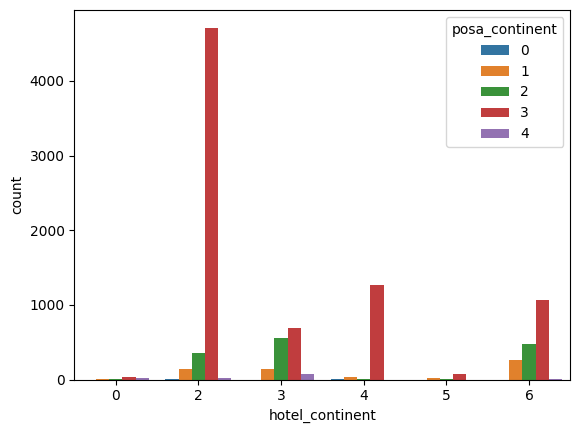

In [16]:
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

### posa_continentに対して携帯での予約を行った数

<Axes: xlabel='posa_continent', ylabel='count'>

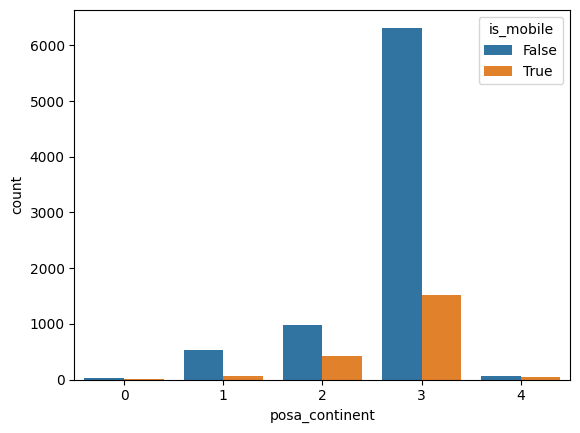

In [17]:
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

### ユーザーの住んでいる国とホテルの泊まり先の国のヒストグラム

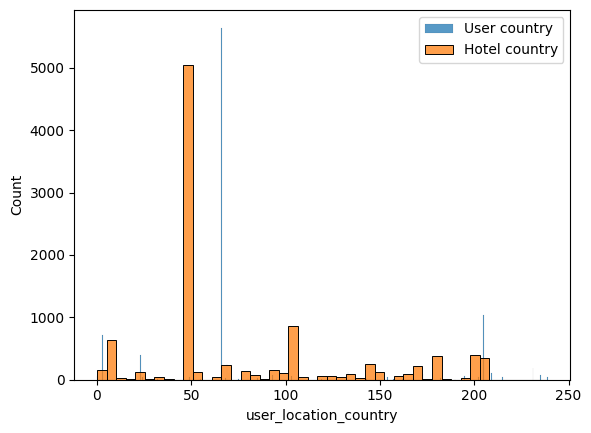

In [18]:
sns.histplot(train['user_location_country'], label="User country")
sns.histplot(train['hotel_country'], label="Hotel country")
plt.legend()

### 泊数の箱ヒゲ図

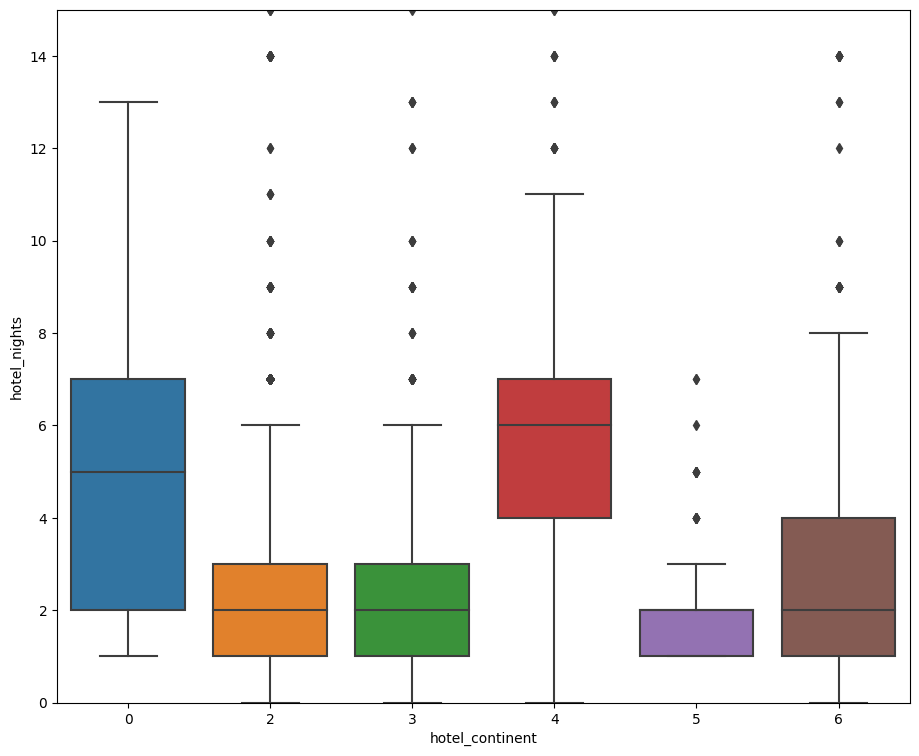

In [19]:
import numpy as np
hotel_nights = train['srch_co'] - train['srch_ci']
hotel_nights = (hotel_nights / np. timedelta64(1,'D')).astype(float)
train['hotel_nights'] = hotel_nights
plt.figure(figsize=(11, 9))
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=train)
lim = ax.set(ylim=(0, 15))

### 泊数のグルーピング数

<Axes: xlabel='hotel_nights', ylabel='count'>

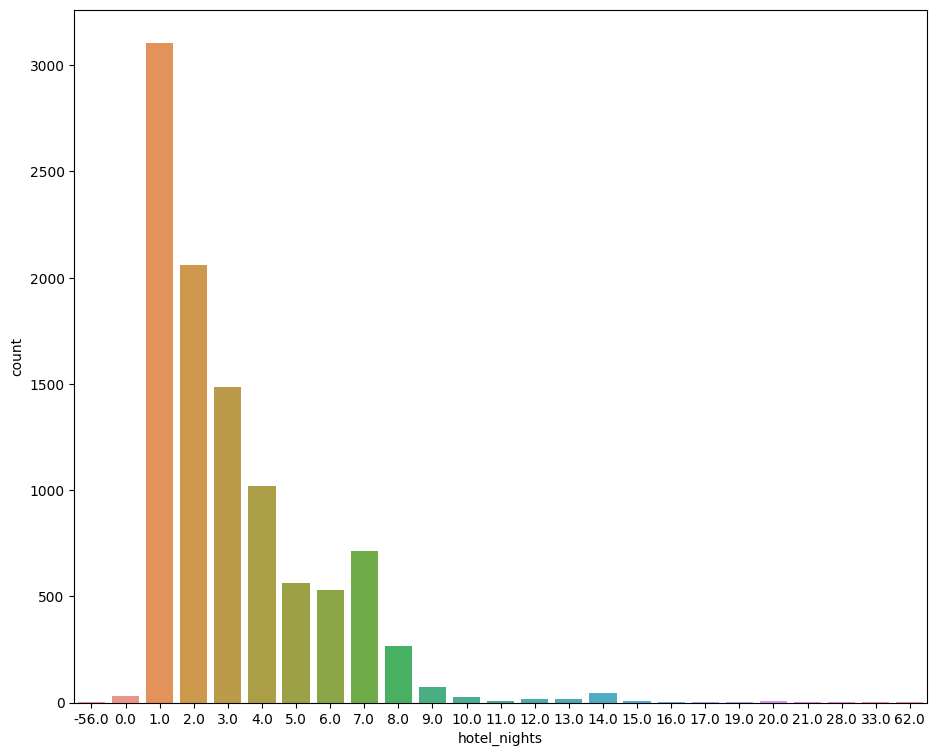

In [20]:
plt.figure(figsize=(11, 9))
sns.countplot(x="hotel_nights", data=train)

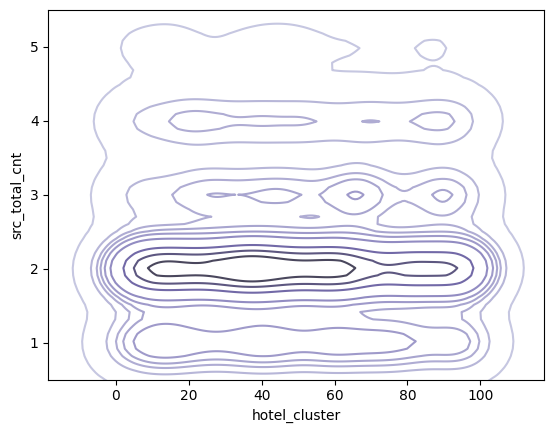

In [21]:
src_total_cnt = train.srch_adults_cnt + train.srch_children_cnt
train['src_total_cnt'] = src_total_cnt
ax = sns.kdeplot(x=train['hotel_cluster'], y=train['src_total_cnt'], cmap="Purples_d")
lim = ax.set(ylim=(0.5, 5.5))

In [22]:
!pip install xgboost
!pip install scikit-learn

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
train = read_csv("../data/train.csv", cols=traincols, nrows=10000)
predictors = [c for c in train.columns if c not in ["hotel_cluster", "date_time", "srch_ci", "srch_co", 'is_booking', 'cnt']]
target = "hotel_cluster"

train_x, test_x, train_y, test_y = train_test_split(train[predictors], train[target], test_size=0.2, shuffle=True)

In [50]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(8000, 18)
(2000, 18)
(8000,)
(2000,)


In [36]:
XGB_CLASSIFIER_DEFAULT_PARAMS = {
    "max_depth": 3,
    "learning_rate": 0.01,
    "n_estimators": 50,
    "random_state": 3,
}
model = xgb.XGBClassifier(**XGB_CLASSIFIER_DEFAULT_PARAMS)

In [42]:
train_x.columns

Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'hotel_continent',
       'hotel_country', 'hotel_market'],
      dtype='object')

In [ ]:
Index(['site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'hotel_continent',
       'hotel_country', 'hotel_market'],
      dtype='object')

In [48]:
train_y.shape

(8000,)

In [52]:
train_x.shape

(8000, 18)

In [53]:
train_y

5958    81
1978    73
7751    64
1997    34
5950     6
        ..
4245    38
371     91
7850    29
6855     8
7449     2
Name: hotel_cluster, Length: 8000, dtype: uint8

In [40]:
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  10000 non-null  datetime64[ns]
 1   site_name                  10000 non-null  uint8         
 2   posa_continent             10000 non-null  uint8         
 3   user_location_country      10000 non-null  uint16        
 4   user_location_region       10000 non-null  uint16        
 5   user_location_city         10000 non-null  uint16        
 6   orig_destination_distance  6271 non-null   float32       
 7   user_id                    10000 non-null  uint32        
 8   is_mobile                  10000 non-null  bool          
 9   is_package                 10000 non-null  bool          
 10  channel                    10000 non-null  uint8         
 11  srch_ci                    9993 non-null   datetime64[ns]
 12  srch_

In [25]:
len(train.hotel_cluster.unique())

100

In [26]:
dtrain = xgb.DMatrix(train_x, label=train_y)

In [27]:
num_round = 30
param = {'max_depth': 10, 'eta': 0.1, 'objective': 'multi:softmax', 'num_class': 100, 'eval_metric': 'map'}
bst = xgb.train(param, dtrain, num_round)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

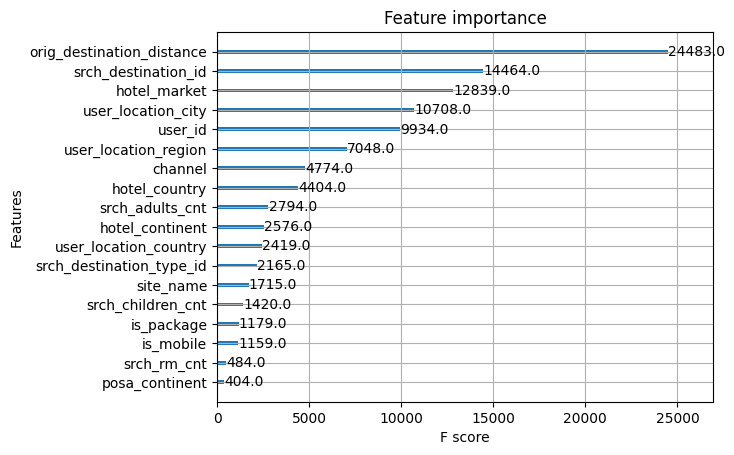

In [28]:
xgb.plot_importance(bst)

In [29]:
from sklearn.metrics import accuracy_score
# test_predictors = [c for c in train.columns if c not in ["hotel_cluster", "date_time", "srch_ci", "srch_co", 'is_booking', 'cnt']]
dvalid = xgb.DMatrix(test_x)
pred = bst.predict(dvalid)
acc = accuracy_score(test_y, pred)
print("Accuracy : ", acc)

Accuracy :  0.343


In [30]:
len(pred)

2000

In [31]:
dtest = xgb.DMatrix(test[predictors])
test_pred = bst.predict(dtest)

In [32]:
submission = pd.DataFrame()
submission["id"] = test["id"]
submission["hotel_cluster"] = test_pred
submission.to_csv('expedia.csv', index=False)

In [33]:
submission

,id,hotel_cluster
0,0,11.0
1,1,8.0
2,2,59.0
3,3,24.0
4,4,84.0
...,...,...
2528238,2528238,92.0
2528239,2528239,22.0
2528240,2528240,54.0
2528241,2528241,60.0
